11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.1984 - val_loss: 0.1393
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1308 - val_loss: 0.1216
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.1179 - val_loss: 0.1118
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1106 - val_loss: 0.1068
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1062 - val_loss: 0.1030
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1029 - val_loss: 0.1005
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1004 - val_loss: 0.0980
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0980 - val_loss: 0.0960
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0961 - val_loss: 0.0941
Epoch 10/10
313/313 [===

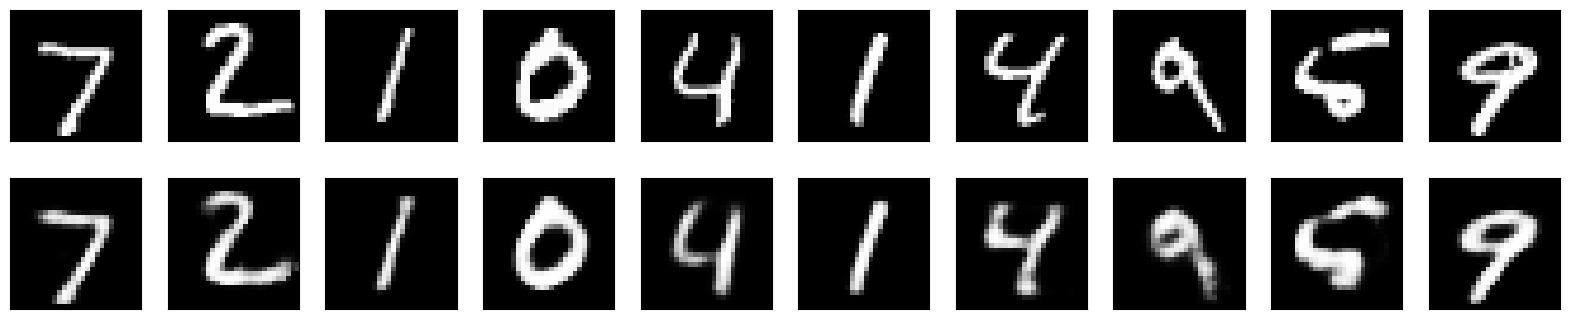

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the encoder architecture
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
])

# Define the decoder architecture
decoder = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[32]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28]),
])

# Combine the encoder and decoder into an autoencoder model
autoencoder = keras.models.Sequential([encoder, decoder])

# Compile the autoencoder model
autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001))

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Use the trained autoencoder to predict the reconstructed images for the test data
decoded_imgs = autoencoder.predict(x_test)

# Plot some of the original test images and their reconstructed counterparts
n = 10 # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()